In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

# Carica il file CSV
    # df = pd.read_csv(f"data/dati_20230518_1820.csv", na_values="NA")

file_path = 'data/dati_20241105_0810.csv'  # Sostituisci con il percorso al tuo file CSV

data = pd.read_csv(file_path,na_values="NA")

# # Pulisci i nomi delle colonne e assicurati che non ci siano spazi indesiderati
# data.columns = data.columns.str.strip()

# # Filtra i dati escludendo "Camporella" e "Civago" e rimuovendo righe con valori mancanti
# filtered_data = data[
#     ~data['stazione'].str.contains('Camporella|Civago', na=False)
# ][['quota', 'temp_val', 'dewpoint', 'temp_wet_bulb']]#.dropna()

# # Ordina i dati per quota in ordine decrescente
# sorted_data = filtered_data.sort_values(by='quota', ascending=True)

data.columns = data.columns.str.strip()

# Converte la colonna datetime in formato datetime di pandas
data['datetime'] = pd.to_datetime(data['datetime'])

# Filtra i dati escludendo "Camporella" e "Civago" e rimuovendo righe con valori mancanti
filtered_data = data[
    ~data['stazione'].str.contains('Camporella|Civago', na=False)
][['datetime', 'quota', 'temp_val', 'dewpoint', 'temp_wet_bulb']]

# Ordina i dati per quota in ordine decrescente
sorted_data = filtered_data[[['datetime', 'quota', 'temp_val', 'dewpoint', 'temp_wet_bulb']]filtered_data.sort_values(by='quota', ascending=True)


In [30]:
sorted_data.head()

,datetime,quota,temp_val,dewpoint,temp_wet_bulb
13,2024-11-05 08:00:00,22,9.8,10.0,9.4
10,2024-11-05 08:00:00,30,10.0,8.9,9.3
17,2024-11-05 08:00:00,32,10.1,10.0,9.9
16,2024-11-05 08:00:00,39,10.3,10.0,9.9
7,2024-11-05 08:00:00,51,10.3,10.6,10.2


In [28]:

# Determina il mese presente nei dati
month = sorted_data['datetime'].dt.month.iloc[0]

# Imposta il range dell'asse x in base al mese
if month in [12, 1, 2]:  # Inverno
    x_range = [-20, 20]
elif month in [6, 7, 8]:  # Estate
    x_range = [0, 40]
else:  # Altri mesi
    x_range = [-10, 30]


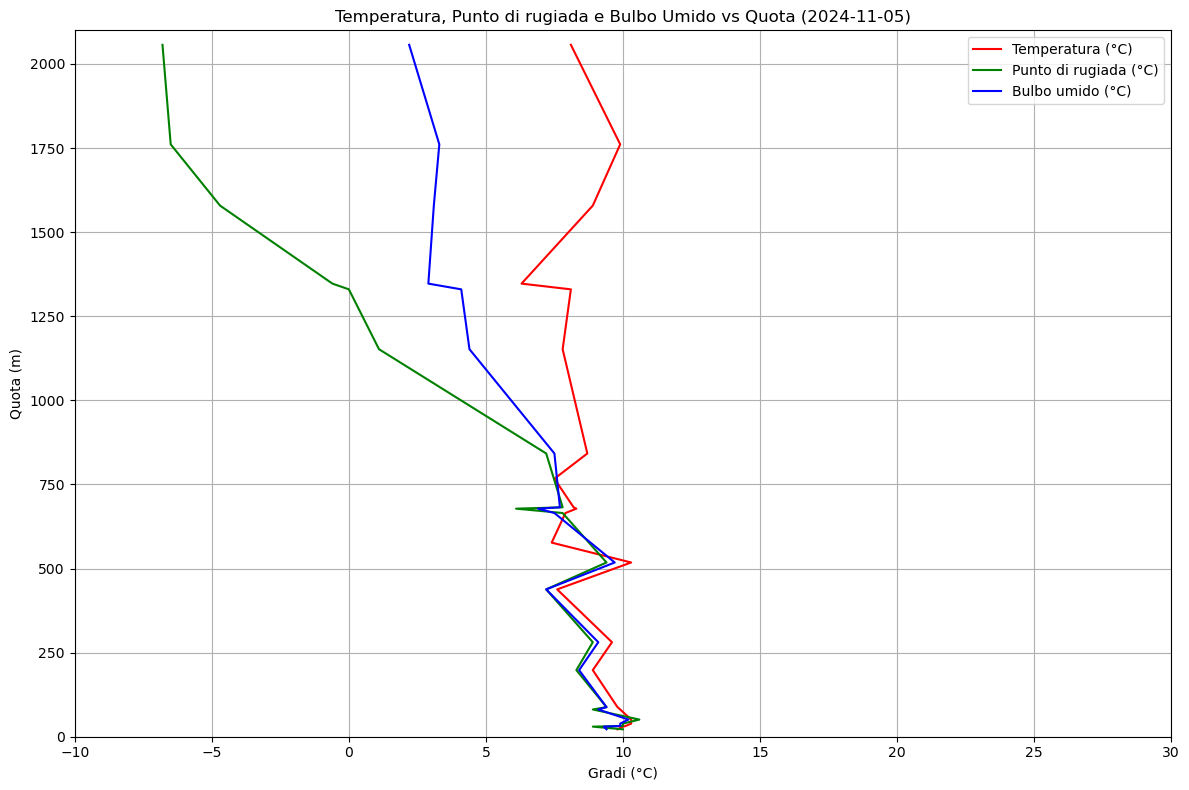

In [38]:

# Crea il grafico
plt.figure(figsize=(12, 8))

if not sorted_data['temp_val'].isna().all():
    plt.plot(
        sorted_data['temp_val'].dropna(),
        sorted_data['quota'][sorted_data['temp_val'].notna()],
        label='Temperatura (°C)',
        color='red',
        # marker='o',
        # linestyle='-'
    )

if not sorted_data['dewpoint'].isna().all():
    plt.plot(
        sorted_data['dewpoint'].dropna(),
        sorted_data['quota'][sorted_data['dewpoint'].notna()],
        label='Punto di rugiada (°C)',
        color='green',
        # marker='x',
        # linestyle='--'
    )

if not sorted_data['temp_wet_bulb'].isna().all():
    plt.plot(
        sorted_data['temp_wet_bulb'].dropna(),
        sorted_data['quota'][sorted_data['temp_wet_bulb'].notna()],
        label='Bulbo umido (°C)',
        color='blue',
        # marker='s',
        # linestyle='-.'
    )

# Inverti l'asse y per mostrare la quota maggiore in alto
plt.gca()

# Imposta il range dell'asse x
plt.xlim(x_range)
plt.ylim([0, 2100])

# Aggiungi etichette, titolo e legenda
plt.xlabel('Gradi (°C)')
plt.ylabel('Quota (m)')
plt.title(f'Temperatura, Punto di rugiada e Bulbo Umido vs Quota ({sorted_data["datetime"].dt.strftime("%Y-%m-%d").iloc[0]})')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [ ]:

# Traccia ogni variabile con un colore diverso
plt.plot(sorted_data['temp_val'], sorted_data['quota'], label='Temperatura (°C)', color='red')#, marker='o', linestyle='-')
plt.plot(sorted_data['dewpoint'], sorted_data['quota'], label='Punto di rugiada (°C)', color='green')#, marker='x', linestyle='--')
plt.plot(sorted_data['temp_wet_bulb'], sorted_data['quota'], label='Bulbo umido (°C)', color='blue')#, marker='s', linestyle='-.')

# Inverti l'asse y per mostrare la quota maggiore in alto
plt.gca()#.invert_yaxis()

# Imposta il range dell'asse x
plt.xlim(x_range)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Temperatura (°C)')
plt.ylabel('Quota (m)')
plt.title(f'Temperatura, Punto di rugiada e Bulbo Umido vs Quota ({sorted_data["datetime"].dt.strftime("%Y-%m-%d").iloc[0]})')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [ ]:

# Crea il grafico
plt.figure(figsize=(12, 8))

# Traccia ogni variabile con un colore diverso
plt.plot(sorted_data['temp_val'], sorted_data['quota'], label='Temperatura (°C)', color='red', marker='o', linestyle='-')
plt.plot(sorted_data['dewpoint'], sorted_data['quota'], label='Dewpoint (°C)', color='green', marker='x', linestyle='--')
plt.plot(sorted_data['temp_wet_bulb'], sorted_data['quota'], label='Bulbo umido (°C)', color='blue', marker='s', linestyle='-.')

# Inverti l'asse y per mostrare la quota maggiore in alto
plt.gca().invert_yaxis()

# Imposta il range dell'asse x
plt.xlim(x_range)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Temperatura (°C)')
plt.ylabel('Quota (m)')
plt.title(f'Temperatura, Dewpoint e Bulbo Umido vs Quota ({sorted_data["datetime"].dt.strftime("%Y-%m-%d").iloc[0]})')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [9]:
sorted_data

,quota,temp_val,dewpoint,temp_wet_bulb
11,22,19.9,NaN,NaN
9,30,20.5,10.6,NaN
15,32,19.6,12.8,NaN
14,39,19.3,13.3,NaN
6,51,19.6,11.7,NaN
5,81,18.4,12.2,NaN
16,88,19.1,11.7,NaN
7,198,17.9,10.0,NaN
4,281,16.5,11.1,NaN
21,438,15.4,10.6,NaN


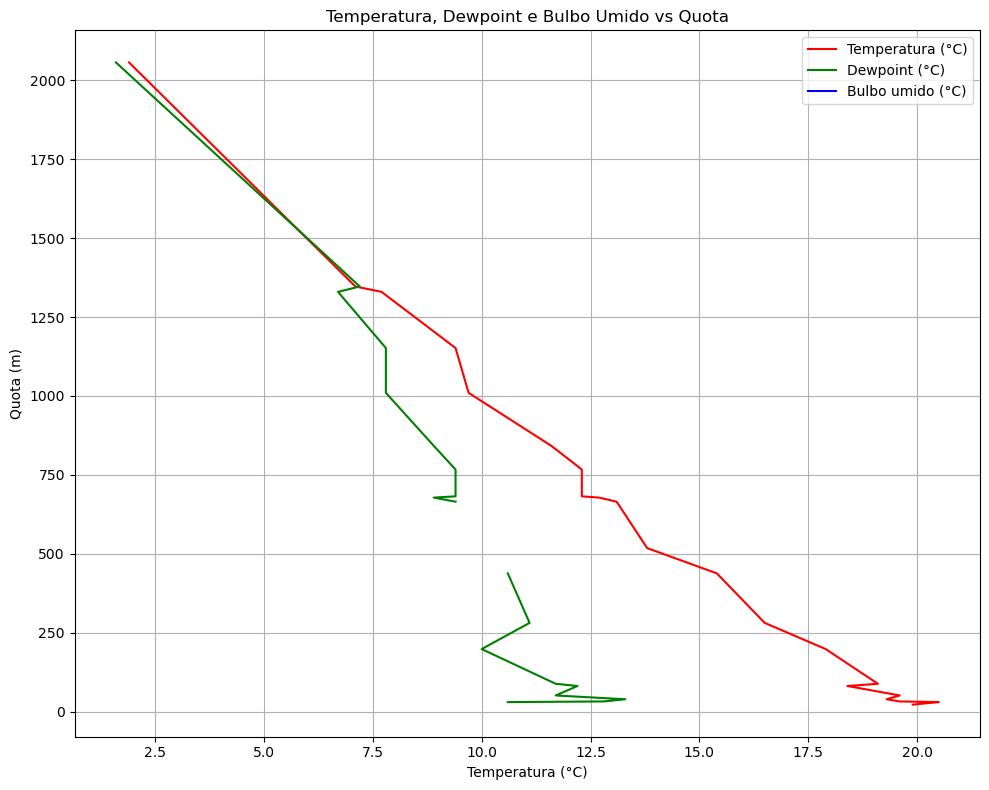

In [12]:

# Crea il grafico
plt.figure(figsize=(10, 8))

# Traccia ogni variabile con un colore diverso
plt.plot(sorted_data['temp_val'], sorted_data['quota'], label='Temperatura (°C)', color='red')#, marker='o', linestyle='-')
plt.plot(sorted_data['dewpoint'], sorted_data['quota'], label='Dewpoint (°C)', color='green')#, marker='x', linestyle='--')
plt.plot(sorted_data['temp_wet_bulb'], sorted_data['quota'], label='Bulbo umido (°C)', color='blue')#, marker='s', linestyle='-.')

# Inverti l'asse y per mostrare la quota maggiore in alto
plt.gca()#.invert_yaxis()

# Aggiungi etichette, titolo e legenda
plt.xlabel('Temperatura (°C)')
plt.ylabel('Quota (m)')
plt.title('Temperatura, Dewpoint e Bulbo Umido vs Quota')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()
